In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np


from wordcloud import WordCloud

Ανάγνωση των αρχείων και δημιουργία αρχείων train_2019 και train_2023 για κάθε μήνα με τις κατάλληλες στήλες αντιστοίχος.

In [ ]:
#@title file making
dfc = pd.read_csv('../content/gdrive/My Drive/data/2019/april/calendar.csv')
dfl = pd.read_csv('../content/gdrive/My Drive/data/2019/april/listings.csv')

col1 = dfc[["listing_id", "minimum_nights", "price"]]
col2 = dfl[["id", "name", "neighbourhood", "transit", "host_response_rate", "host_has_profile_pic", "host_identity_verified", "latitude" , "longitude" ,"host_since", "zipcode", "city", "description", "accommodates", "bathrooms", "bed_type", "amenities", "price", "minimum_nights", "availability_365", "last_review", "review_scores_rating", "number_of_reviews", "beds", "bedrooms", "first_review", "instant_bookable", "cancellation_policy", "property_type", "room_type"]]
col1.head()

df = pd.merge(col1, col2, left_on = 'listing_id', right_on = 'id', how = 'inner')

#clean data by removing certain rows when any of the columns 'id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x' are NaN
#and removing extreme price values
df['host_response_rate'] = df['host_response_rate'].str.replace('\W', '')
df['price_x'] = df['price_x'].str.replace('$', '')

df['price_x'] = pd.to_numeric(df['price_x'], errors = 'coerce')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors = 'coerce')


df['neighbourhood'] = df['neighbourhood'].str.replace('\W', '')

df.dropna(subset = ['id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x'], inplace = True)

median = df.loc[df['price_x']<3000, 'price_x'].median()
df.loc[df.price_x > 3000, 'price_x'] = np.nan
df['price_x'].fillna(median, inplace = True)

df.to_csv('../content/gdrive/My Drive/data/2019/april/train_2019.csv')

<ipython-input-8-b82cd93a1983>:3: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfl = pd.read_csv('../content/gdrive/My Drive/data/2019/april/listings.csv')


In [ ]:
dfc2 = pd.read_csv('../content/gdrive/My Drive/data/2019/march/calendar.csv')
dfl2 = pd.read_csv('../content/gdrive/My Drive/data/2019/march/listings.csv')

col1_2 = dfc2[["listing_id", "minimum_nights", "price"]]

col2_2 = dfl2[["id", "name", "neighbourhood", "transit", "host_response_rate", "host_has_profile_pic", "host_identity_verified", "latitude" , "longitude" ,"host_since", "zipcode", "city", "description", "accommodates", "bathrooms", "bed_type", "amenities", "price", "minimum_nights", "availability_365", "last_review", "review_scores_rating", "number_of_reviews", "beds", "bedrooms", "first_review", "instant_bookable", "cancellation_policy", "property_type", "room_type"]]
col1_2.head()
df2 = pd.merge(col1_2, col2_2, left_on = 'listing_id', right_on = 'id', how = 'inner')


#clean data by removing certain rows when any of the columns 'id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x' are NaN
#and removing extreme price values
df2['host_response_rate'] = df2['host_response_rate'].str.replace('\W', '')
df2['price_x'] = df2['price_x'].str.replace('$', '')

df2['price_x'] = pd.to_numeric(df2['price_x'], errors = 'coerce')
df2['host_response_rate'] = pd.to_numeric(df2['host_response_rate'], errors = 'coerce')


df2['neighbourhood'] = df2['neighbourhood'].str.replace('\W', '')

df2.dropna(subset = ['id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x'], inplace = True)

median = df2.loc[df2['price_x']<3000, 'price_x'].median()
df2.loc[df2.price_x > 3000, 'price_x'] = np.nan
df2['price_x'].fillna(median, inplace = True)

df2.to_csv('../content/gdrive/My Drive/data/2019/march/train_2019.csv')

<ipython-input-9-fe7441e00f54>:2: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfl2 = pd.read_csv('../content/gdrive/My Drive/data/2019/march/listings.csv')


In [ ]:
dfc3 = pd.read_csv('../content/gdrive/My Drive/data/2019/febrouary/calendar.csv')
dfl3 = pd.read_csv('../content/gdrive/My Drive/data/2019/febrouary/listings.csv')

col1_3 = dfc3[["listing_id", "minimum_nights", "price"]]
col2_3 = dfl3[["id", "name", "neighbourhood", "transit", "host_response_rate", "host_has_profile_pic", "host_identity_verified", "latitude" , "longitude" ,"host_since", "zipcode", "city", "description", "accommodates", "bathrooms", "bed_type", "amenities", "price", "minimum_nights", "availability_365", "last_review", "review_scores_rating", "number_of_reviews", "beds", "bedrooms", "first_review", "instant_bookable", "cancellation_policy", "property_type", "room_type"]]
col1_3.head()
df3 = pd.merge(col1_3, col2_3, left_on = 'listing_id', right_on = 'id', how = 'inner')


#clean data by removing certain rows when any of the columns 'id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x' are NaN
#and removing extreme price values
df3['host_response_rate'] = df3['host_response_rate'].str.replace('\W', '')
df3['price_x'] = df3['price_x'].str.replace('$', '')

df3['price_x'] = pd.to_numeric(df3['price_x'], errors = 'coerce')
df3['host_response_rate'] = pd.to_numeric(df3['host_response_rate'], errors = 'coerce')


df3['neighbourhood'] = df3['neighbourhood'].str.replace('\W', '')

df3.dropna(subset = ['id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x'], inplace = True)

median = df3.loc[df3['price_x']<3000, 'price_x'].median()
df3.loc[df3.price_x > 3000, 'price_x'] = np.nan
df3['price_x'].fillna(median, inplace = True)

df3.to_csv('../content/gdrive/My Drive/data/2019/febrouary/train_2019.csv')

<ipython-input-10-f7130a0f6f52>:2: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfl3 = pd.read_csv('../content/gdrive/My Drive/data/2019/febrouary/listings.csv')


In [ ]:
dfc23 = pd.read_csv('../content/gdrive/My Drive/data/2023/june/calendar.csv')
dfl23 = pd.read_csv('../content/gdrive/My Drive/data/2023/june/listings.csv')

col123 = dfc23[["listing_id", "minimum_nights", "price"]]
col223 = dfl23[["id", "name", "neighbourhood_cleansed", "host_response_rate", "host_has_profile_pic", "host_identity_verified", "latitude" , "longitude" ,"host_since", "description", "accommodates", "bathrooms", "amenities", "price", "minimum_nights", "availability_365", "last_review", "review_scores_rating", "number_of_reviews", "beds", "bedrooms", "first_review", "instant_bookable", "property_type", "room_type"]]
col123.head()
df23 = pd.merge(col123, col223, left_on = 'listing_id', right_on = 'id', how = 'inner')


#clean data by removing certain rows when any of the columns 'id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x' are NaN
#and removing extreme price values
df23['host_response_rate'] = df23['host_response_rate'].str.replace('\W', '')
df23['price_x'] = df23['price_x'].str.replace('$', '')

df23['price_x'] = pd.to_numeric(df23['price_x'], errors = 'coerce')
df23['host_response_rate'] = pd.to_numeric(df23['host_response_rate'], errors = 'coerce')


df23['neighbourhood_cleansed'] = df23['neighbourhood_cleansed'].str.replace('\W', '')

df23.dropna(subset = ['id', 'listing_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price_x'], inplace = True)

median = df23.loc[df23['price_x']<3000, 'price_x'].median()
df23.loc[df23.price_x > 3000, 'price_x'] = np.nan
df23['price_x'].fillna(median, inplace = True)

df23.to_csv('../content/gdrive/My Drive/data/2023/june/train_2023.csv')

In [ ]:
dfc223 = pd.read_csv('../content/gdrive/My Drive/data/2023/march/calendar.csv')
dfl223 = pd.read_csv('../content/gdrive/My Drive/data/2023/march/listings.csv')

col1223 = dfc223[["listing_id", "minimum_nights", "price"]]
col2223 = dfl223[["id", "name", "neighbourhood_cleansed", "host_response_rate", "host_has_profile_pic", "host_identity_verified", "latitude" , "longitude" ,"host_since", "description", "accommodates", "bathrooms", "amenities", "price", "minimum_nights", "availability_365", "last_review", "review_scores_rating", "number_of_reviews", "beds", "bedrooms", "first_review", "instant_bookable", "property_type", "room_type"]]
col1223.head()
df223 = pd.merge(col1223, col2223, left_on = 'listing_id', right_on = 'id', how = 'inner')


#clean data by removing certain rows when any of the columns 'id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x' are NaN
#and removing extreme price values
df223['host_response_rate'] = df223['host_response_rate'].str.replace('\W', '')
df223['price_x'] = df223['price_x'].str.replace('$', '')

df223['price_x'] = pd.to_numeric(df223['price_x'], errors = 'coerce')
df223['host_response_rate'] = pd.to_numeric(df223['host_response_rate'], errors = 'coerce')


df223['neighbourhood_cleansed'] = df223['neighbourhood_cleansed'].str.replace('\W', '')

df223.dropna(subset = ['id', 'listing_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price_x'], inplace = True)

median = df223.loc[df223['price_x']<3000, 'price_x'].median()
df223.loc[df223.price_x > 3000, 'price_x'] = np.nan
df223['price_x'].fillna(median, inplace = True)

df223.to_csv('../content/gdrive/My Drive/data/2023/march/train_2023.csv')

In [ ]:
dfc323 = pd.read_csv('../content/gdrive/My Drive/data/2023/september/calendar.csv')
dfl323 = pd.read_csv('../content/gdrive/My Drive/data/2023/september/listings.csv')

col1323 = dfc323[["listing_id", "minimum_nights", "price"]]
col2323 = dfl323[["id", "name", "neighbourhood_cleansed", "host_response_rate", "host_has_profile_pic", "host_identity_verified", "latitude" , "longitude" ,"host_since", "description", "accommodates", "bathrooms", "amenities", "price", "minimum_nights", "availability_365", "last_review", "review_scores_rating", "number_of_reviews", "beds", "bedrooms", "first_review", "instant_bookable", "property_type", "room_type"]]
col1323.head()
df323 = pd.merge(col1323, col2323, left_on = 'listing_id', right_on = 'id', how = 'inner')


#clean data by removing certain rows when any of the columns 'id', 'listing_id', 'neighbourhood', 'zipcode', 'city', 'latitude', 'longitude', 'price_x' are NaN
#and removing extreme price values
df323['host_response_rate'] = df323['host_response_rate'].str.replace('\W', '')
df323['price_x'] = df323['price_x'].str.replace('$', '')

df323['price_x'] = pd.to_numeric(df323['price_x'], errors = 'coerce')
df323['host_response_rate'] = pd.to_numeric(df323['host_response_rate'], errors = 'coerce')


df323['neighbourhood_cleansed'] = df323['neighbourhood_cleansed'].str.replace('\W', '')

df323.dropna(subset = ['id', 'listing_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price_x'], inplace = True)

median = df323.loc[df323['price_x']<3000, 'price_x'].median()
df323.loc[df323.price_x > 3000, 'price_x'] = np.nan
df323['price_x'].fillna(median, inplace = True)

df323.to_csv('../content/gdrive/My Drive/data/2023/september/train_2023.csv')

Διάβασμα των αρχέιων train_2019 για κάθε μήνα ώστε να γίνουν concat σε ένα αρχείο για όλο το έτος 2019

In [6]:
#@title File reads
dft19_1 = pd.read_csv('../content/gdrive/My Drive/data/2019/april/train_2019.csv')

In [7]:
dft19_2 = pd.read_csv('../content/gdrive/My Drive/data/2019/march/train_2019.csv')

<ipython-input-7-b0c1b3ebfa51>:1: DtypeWarning: Columns (24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  dft19_2 = pd.read_csv('../content/gdrive/My Drive/data/2019/march/train_2019.csv')


In [8]:
dft19_3 = pd.read_csv('../content/gdrive/My Drive/data/2019/febrouary/train_2019.csv')

<ipython-input-8-11110a25c7a2>:1: DtypeWarning: Columns (24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  dft19_3 = pd.read_csv('../content/gdrive/My Drive/data/2019/febrouary/train_2019.csv')


In [9]:
#@title Dataframe concat
full = pd.concat([dft19_1, dft19_2, dft19_3], axis = 0)

<Axes: title={'center': 'count'}, xlabel='room_type'>

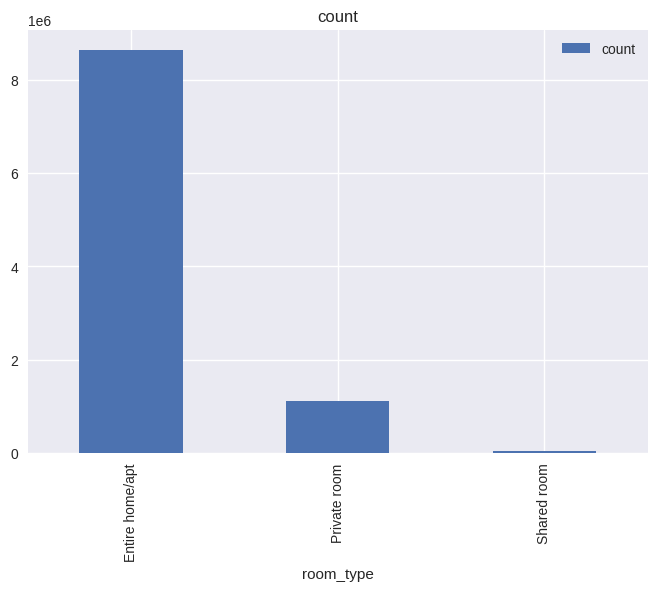

In [29]:
#@title 1.1
df_test = full['room_type'].value_counts().to_frame() #count all values and place them in dataframe df_test

df_test.plot( kind='bar', title='count')

<Axes: title={'center': 'Average price'}>

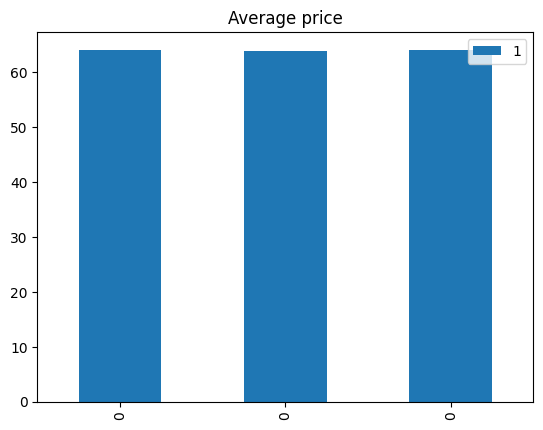

In [ ]:
#@title 1.2
data = [['april', dft19_1['price_x'].mean()]]
dtemp = pd.DataFrame(data)

data2 = [['march', dft19_2['price_x'].mean()]]
dtemp2 = pd.DataFrame(data2)
result = pd.DataFrame(columns = ['month', 'avg'])

result = pd.concat([dtemp, dtemp2])

data3 = [['febrouary', dft19_3['price_x'].mean()]]
dtemp3 = pd.DataFrame(data3)


result = pd.concat([result, dtemp3])
result = result.rename(columns={'': 'month', '': 'avg'})


result.plot(kind='bar', title='Average price')


In [ ]:
# @title 1.3

group = full.groupby("neighbourhood")[["number_of_reviews"]].sum()  #sum up all reviews for all neighbourhoods
group2 = group.nlargest(5, 'number_of_reviews') #take only the 5 largest counts

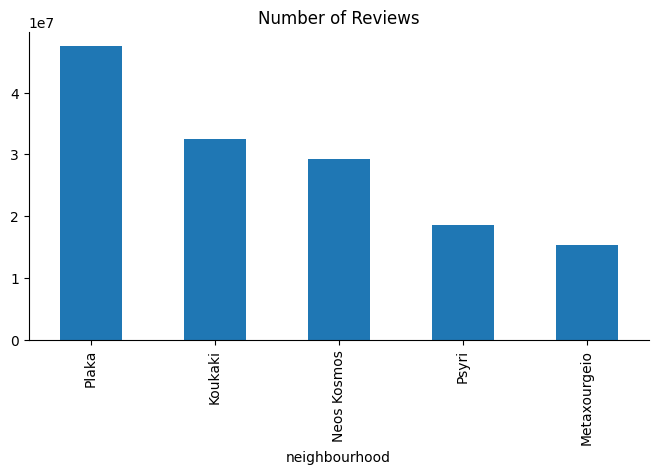

In [ ]:
group2['number_of_reviews'].plot(kind='bar', figsize=(8, 4), title='Number of Reviews') #neighbourhood and review count graph
plt.gca().spines[['top', 'right']].set_visible(False)


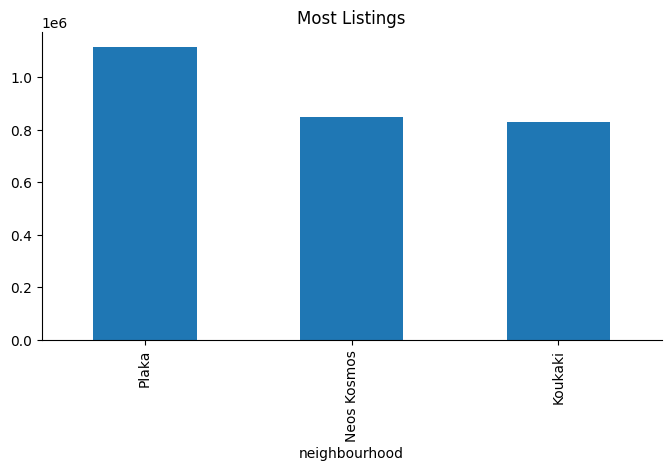

In [ ]:
#@title 1.4
group = full.groupby("neighbourhood")[["listing_id"]].count() #count listings
group2 = group.nlargest(3, 'listing_id')  #show the top 3 counts to compare with the one with the most listings


group2['listing_id'].plot(kind='bar', figsize=(8, 4), title='Most Listings')
plt.gca().spines[['top', 'right']].set_visible(False)

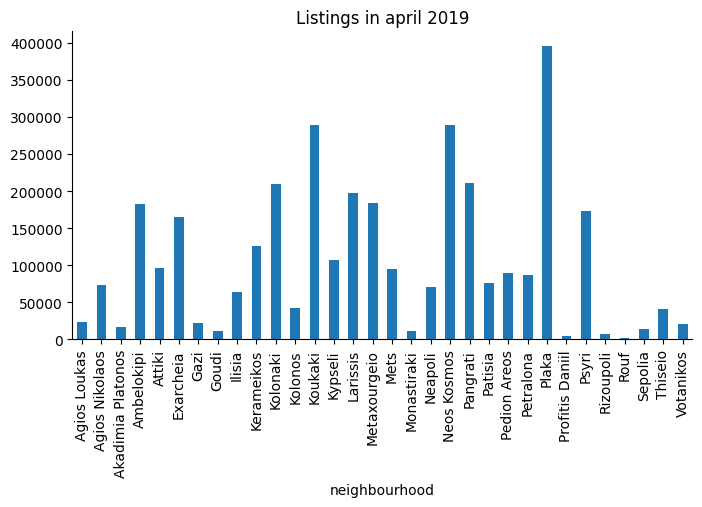

In [ ]:
#@title 1.5
groupc = dft19_1.groupby("neighbourhood")[["listing_id"]].count()   #entries per neighbourhood for every month seperate

groupc['listing_id'].plot(kind='bar', figsize=(8, 4), title='Listings in april 2019')
plt.gca().spines[['top', 'right']].set_visible(False)

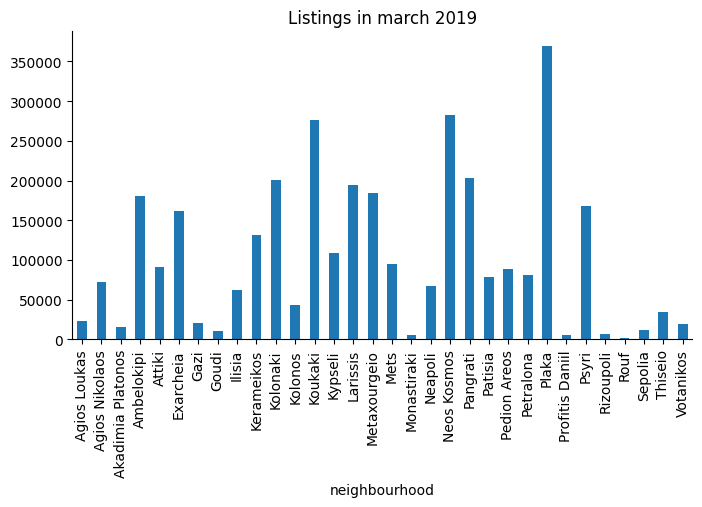

In [ ]:
groupd = dft19_2.groupby("neighbourhood")[["listing_id"]].count()

groupd['listing_id'].plot(kind='bar', figsize=(8, 4), title='Listings in march 2019')
plt.gca().spines[['top', 'right']].set_visible(False)

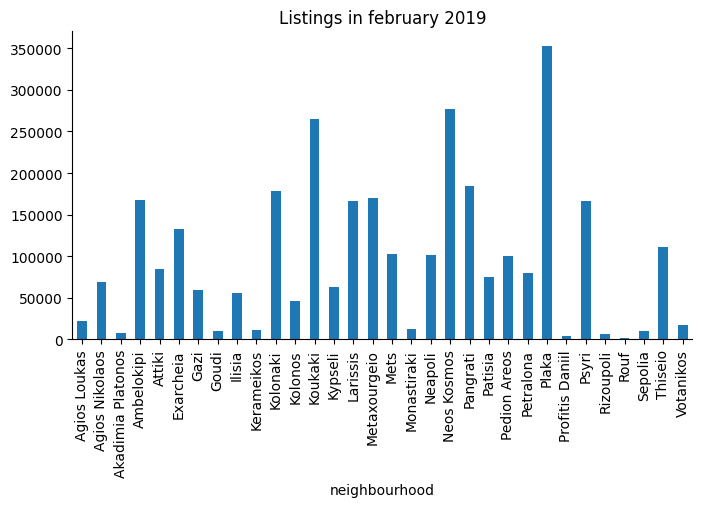

In [ ]:
groupe = dft19_3.groupby("neighbourhood")[["listing_id"]].count()

groupe['listing_id'].plot(kind='bar', figsize=(8, 4), title='Listings in february 2019')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# @title 1.6
test = full['neighbourhood'].value_counts().to_frame() #count all values of neighbourhood column and place them in a dataframe

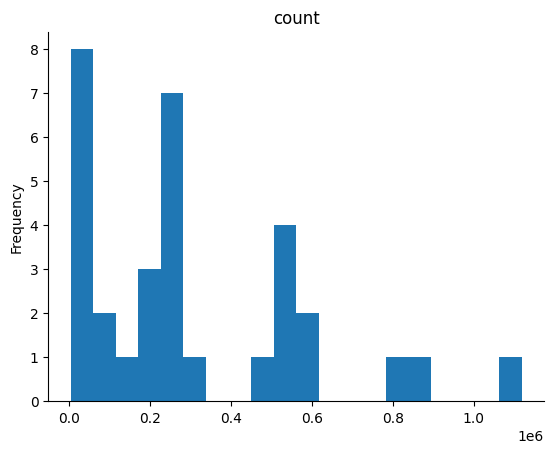

In [ ]:
test['count'].plot(kind='hist', bins=20, title='count') #histogram of neighbourhood column
plt.gca().spines[['top', 'right',]].set_visible(False)

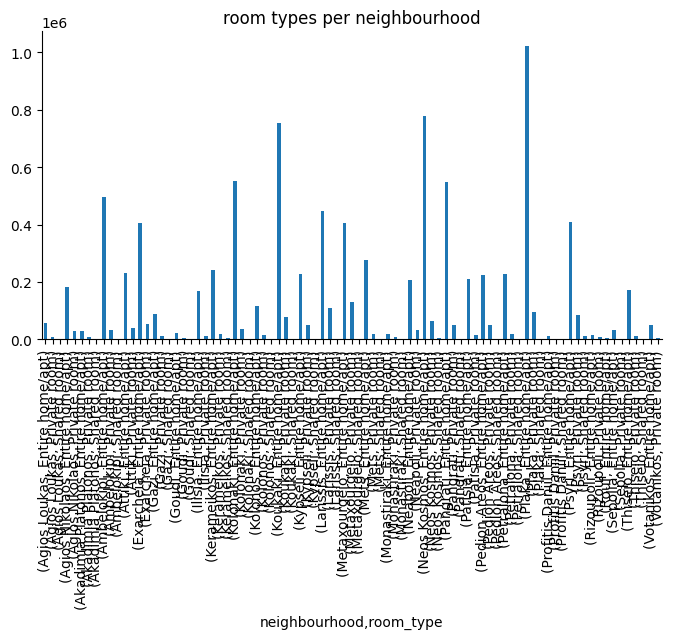

In [ ]:
#@title 1.7
df_test = full.groupby('neighbourhood')[['room_type']].value_counts().to_frame()

df_test['count'].plot(kind='bar', figsize=(8, 4), title='room types per neighbourhood')
plt.gca().spines[['top', 'right']].set_visible(False)
#dft = df_test.groupby(['neighbourhood'])[['count']].max()


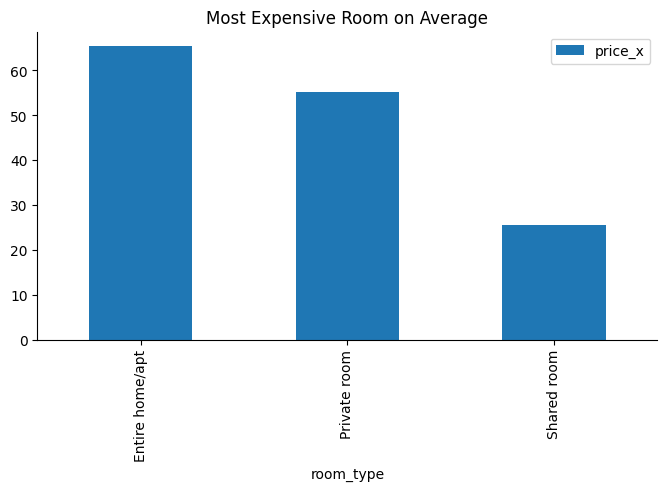

In [ ]:
#@title 1.8

df_room = full.groupby('room_type')[['price_x']].mean()  #average price for all room types

df_room.plot(kind='bar', figsize=(8, 4), title='Most Expensive Room on Average')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#@title 1.9
m = folium.Map(location=(40, 24), zoom_start=7, tiles="cartodb positron")

for i in range(0, 100):
    html = full.loc[i,['listing_id','neighbourhood']].to_html(
        classes="table table-striped table-hover table-condensed table-responsive"
    )
    popup = folium.Popup(html, max_width=500)
    folium.Marker([full.iloc[i]['latitude'], full.iloc[i]['longitude']], popup=popup).add_to(m)

m

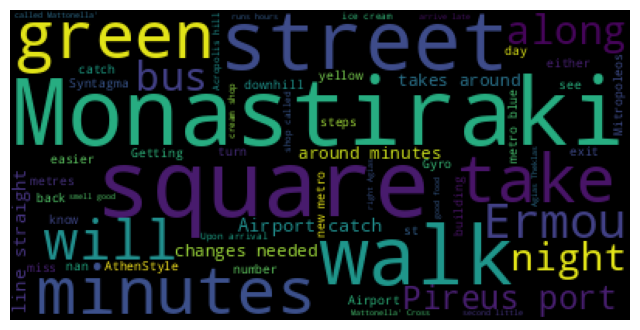

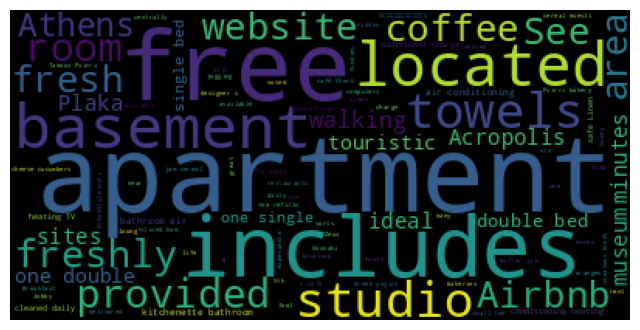

In [30]:
#@title 1.10
text2 = full['transit'].values
wordcloud2 = WordCloud().generate(str(text2))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

text3 = full['description'].values
wordcloud3 = WordCloud().generate(str(text3))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
#@title 1.12
value = [2]
mask = full['accommodates'].isin(value) #use a mask to take only rooms that accommodate exactly 2 people
active = full[mask]

<Axes: xlabel='neighbourhood'>

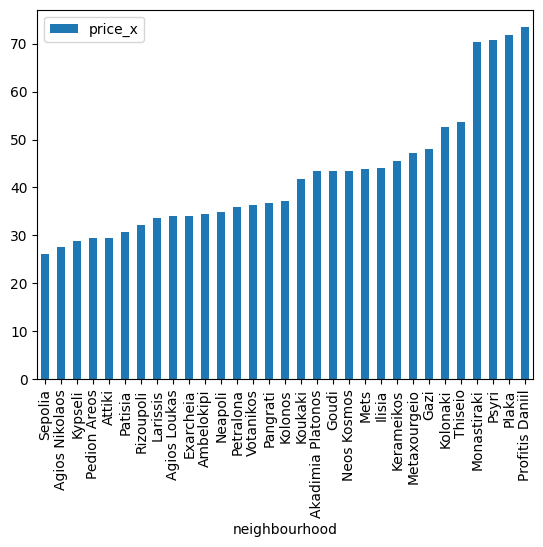

In [ ]:
gr = active.groupby(['neighbourhood', 'accommodates'], as_index = False)[['price_x']].mean().sort_values(['price_x'])  #sorted average price per neighbourhood of rooms that accommodate exactly 2 people

gr.plot(x="neighbourhood", y=["price_x"], kind="bar")

In [ ]:
avg = gr['price_x'].mean() #average price for the entire Athens area
deviation = 0.1*avg  #assumption that any neighbourhood that is 10% above the average cost is expensive
deviation            #any neighbourhood 10% bellow average cost is cheap and anything in between is normal

average = []
economic = []
costly = []



for i in range(len(gr)): #check the full column of average price and sort neighbourhoods
  if gr.iloc[i]['price_x'] > (avg + deviation):
    costly.append(gr.iloc[i]['neighbourhood'])
  elif gr.iloc[i]['price_x'] < (avg - deviation):
    economic.append(gr.iloc[i]['neighbourhood'])
  else:
    average.append(gr.iloc[i]['neighbourhood'])

av = pd.DataFrame(average, columns = ['Average Neighbourhoods']) #make dataframes from the sorted neighbourhoods
co = pd.DataFrame(costly, columns = ['Costly Neighbourhoods'])
eco = pd.DataFrame(economic, columns = ['Cheap Neighbourhoods'])

print(av)
print(co)
print(eco)

  Average Neighbourhoods
0                Koukaki
1      Akadimia Platonos
2                  Goudi
3            Neos Kosmos
4                   Mets
5                 Ilisia
6             Kerameikos
  Costly Neighbourhoods
0          Metaxourgeio
1                  Gazi
2              Kolonaki
3               Thiseio
4           Monastiraki
5                 Psyri
6                 Plaka
7       Profitis Daniil
   Cheap Neighbourhoods
0               Sepolia
1        Agios Nikolaos
2               Kypseli
3          Pedion Areos
4                Attiki
5               Patisia
6             Rizoupoli
7              Larissis
8          Agios Loukas
9             Exarcheia
10           Ambelokipi
11              Neapoli
12            Petralona
13            Votanikos
14             Pangrati
15              Kolonos


<Axes: title={'center': 'count'}, xlabel='property_type'>

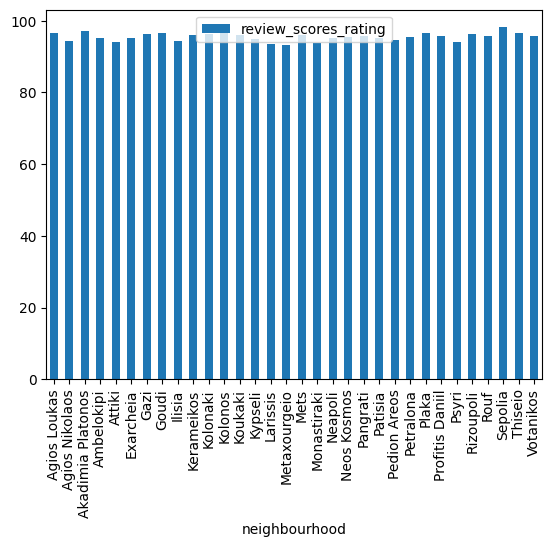

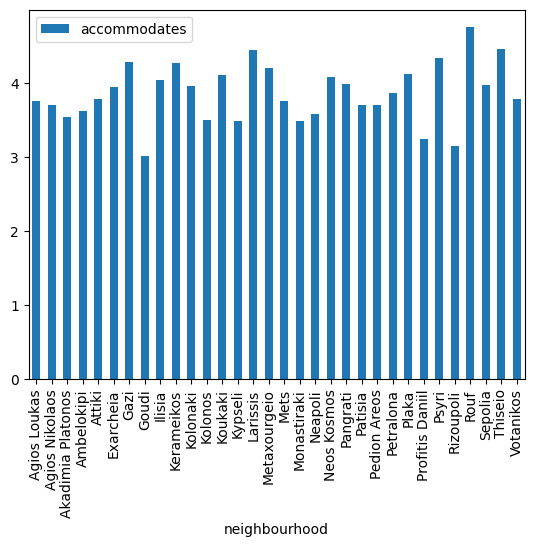

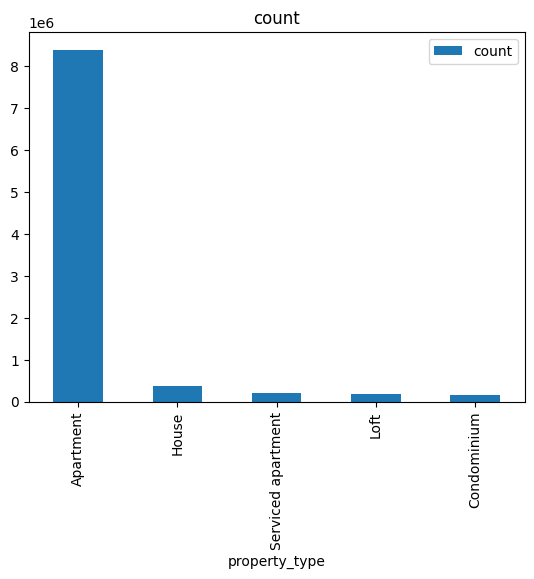

In [ ]:
#@title 1.13
rev = full.groupby('neighbourhood')[['review_scores_rating']].mean()  #1. average review scores for each neighbourhood
rev.plot(kind = 'bar')

occ = full.groupby('neighbourhood')[['accommodates']].mean() #2. average number of people rooms can accommodate in each neighbourhood
occ.plot(kind = 'bar')

df_prop = full['property_type'].value_counts().to_frame()  #3. top 5 most popular property types in Athens
df_prop5 = df_prop.head(5)

df_prop5.plot(kind='bar', title='count')

<ipython-input-47-51c193aa44bb>:2: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfl = pd.read_csv('../content/gdrive/My Drive/data/2019/april/listings.csv')


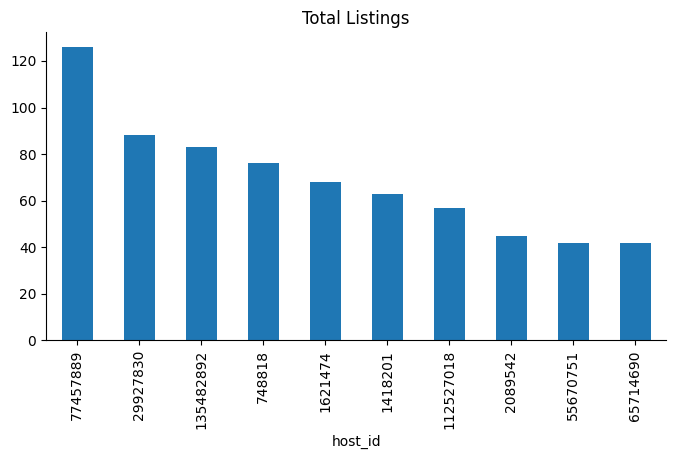

In [ ]:
# @title 1.14
dfl = pd.read_csv('../content/gdrive/My Drive/data/2019/april/listings.csv')
bnb = dfl.groupby("host_id")[["id"]].count()
bnb2 = bnb.nlargest(10, 'id') #10 host ids with the most listings


bnb2['id'].plot(kind='bar', figsize=(8, 4), title='Total Listings')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#@title 1.15
#We can see that the average listing price has increased from 2019 to 2023 by around 40% overall
#While the most expensive neighbourhoods have stayed as the most expensive with the exception of Psyri being replaced by Eksarxeia
#Also the amount of neighbourhoods listed as expensive has gone up between the years of 2019 and 2023
#Additionally, the cheapest neighbourhood on average gone from roughly 30$ up to 40$, an increase of 33%
#WHile there was such a big increase in the average price there was also a massive increase of around 100% in the amount of listings that occured from 2019 to 2023
#indicating that even though the supply, meaning the rental units had gone up, the demand probably increased even more leading the enormous price increase of around 40% on average